# Car Price Prediction Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [6]:
#Check null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


df.columns

final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_dataset

In [8]:
df.drop(['Car_Name'], axis=1,inplace=True) # Drop car name column

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
ul=6+(1.5*(6-0.9))  # Q3 + 1.5 IQR
df[df["Selling_Price"]>ul]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
69,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0


In [11]:
df.shape

(301, 8)

In [12]:
import datetime 

currentYear = datetime.date.today().year

print(currentYear)

2022


In [13]:
df['No_years']=currentYear-df['Year']

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [15]:
df.drop(['Year'], axis=1,inplace=True) # Drop year column

In [16]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
df.shape

(301, 8)

In [18]:
#Takiing care of categorical features. One hot encding
final_dataset=pd.get_dummies(df,drop_first=True)

In [19]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [20]:
final_dataset.shape

(301, 9)

In [21]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [22]:
import seaborn as sns

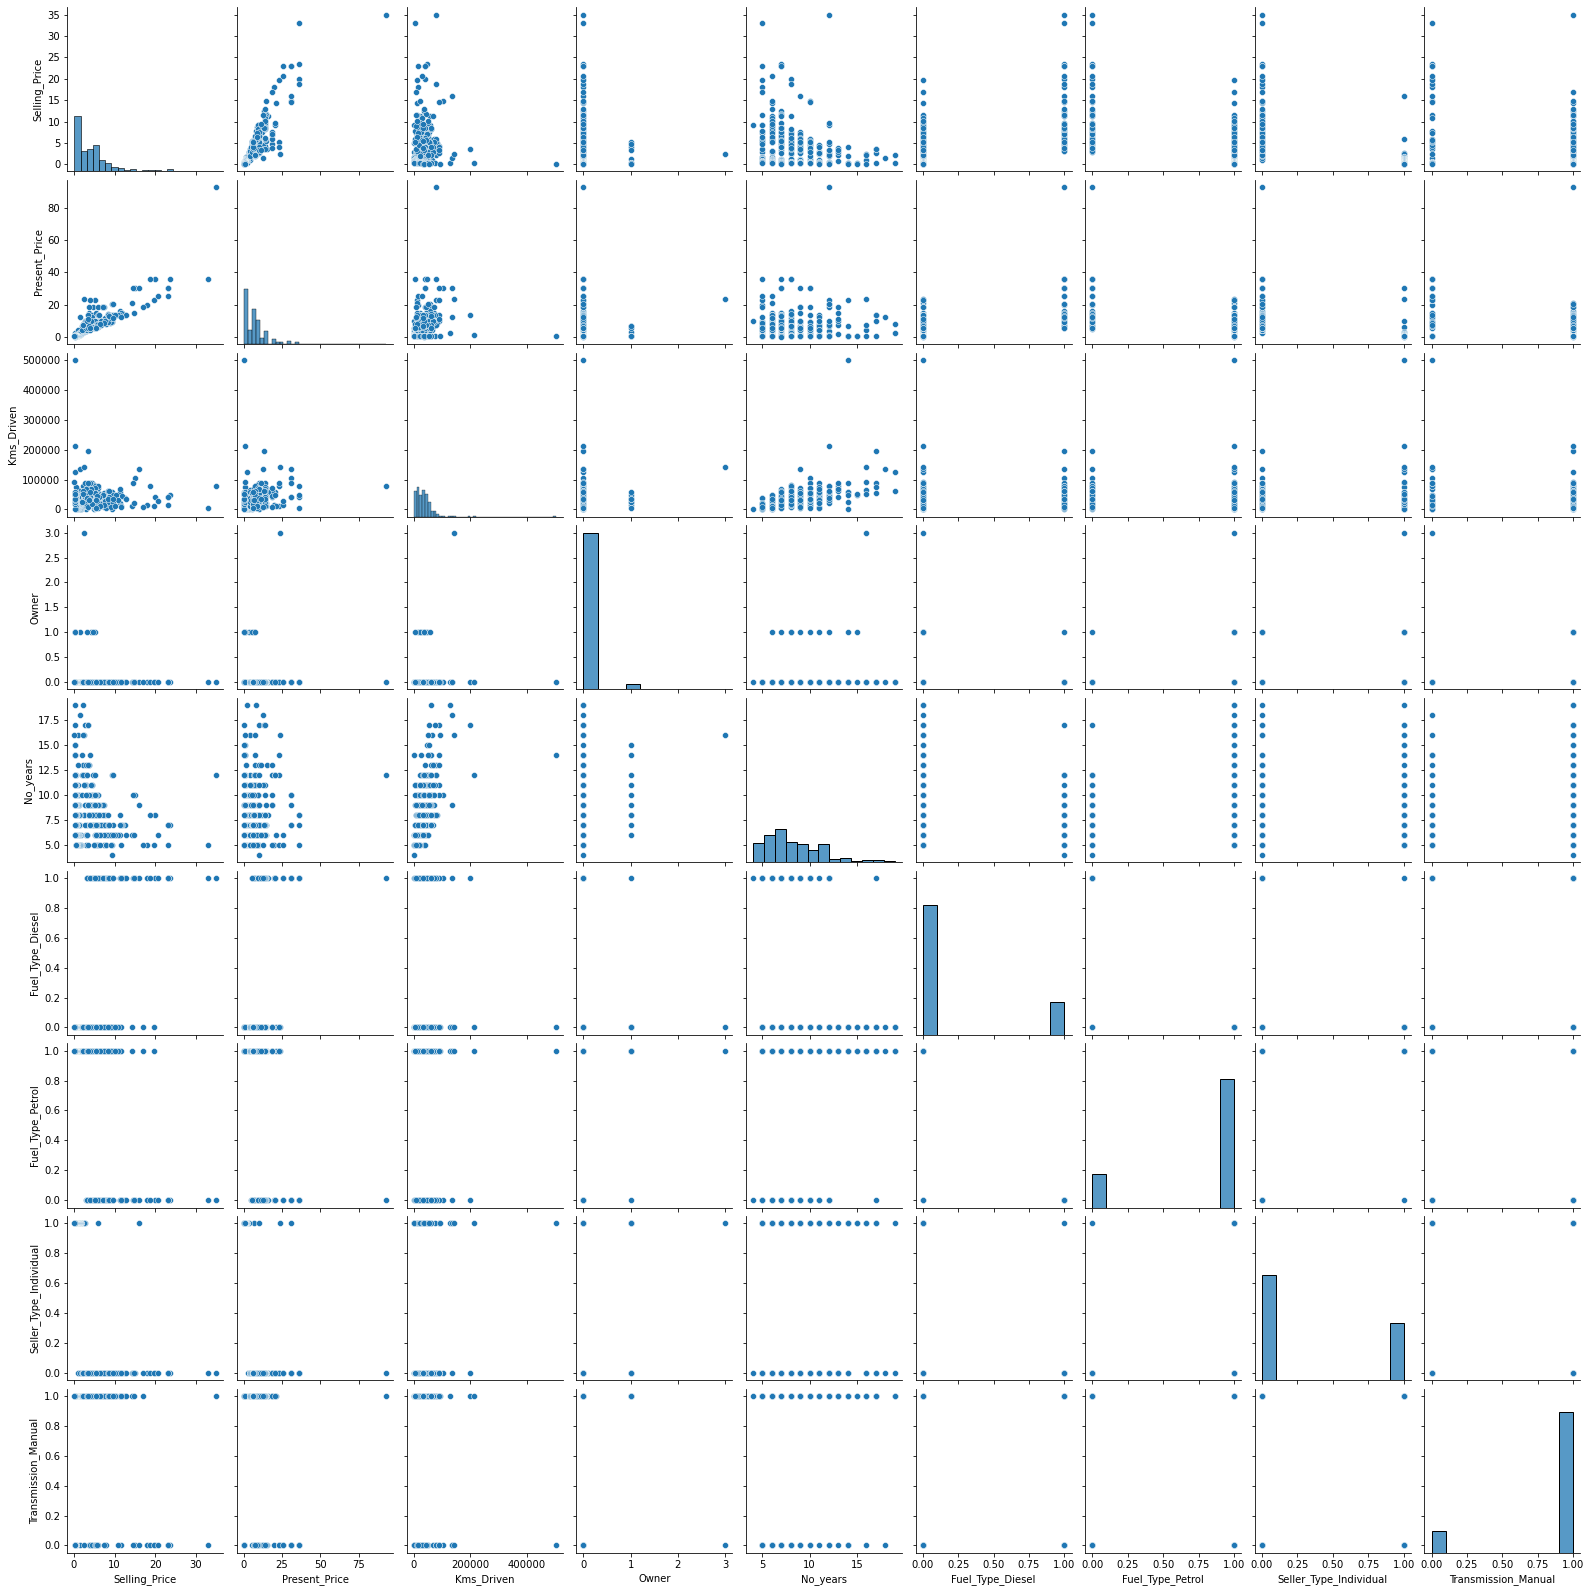

In [23]:
sns.pairplot(final_dataset)

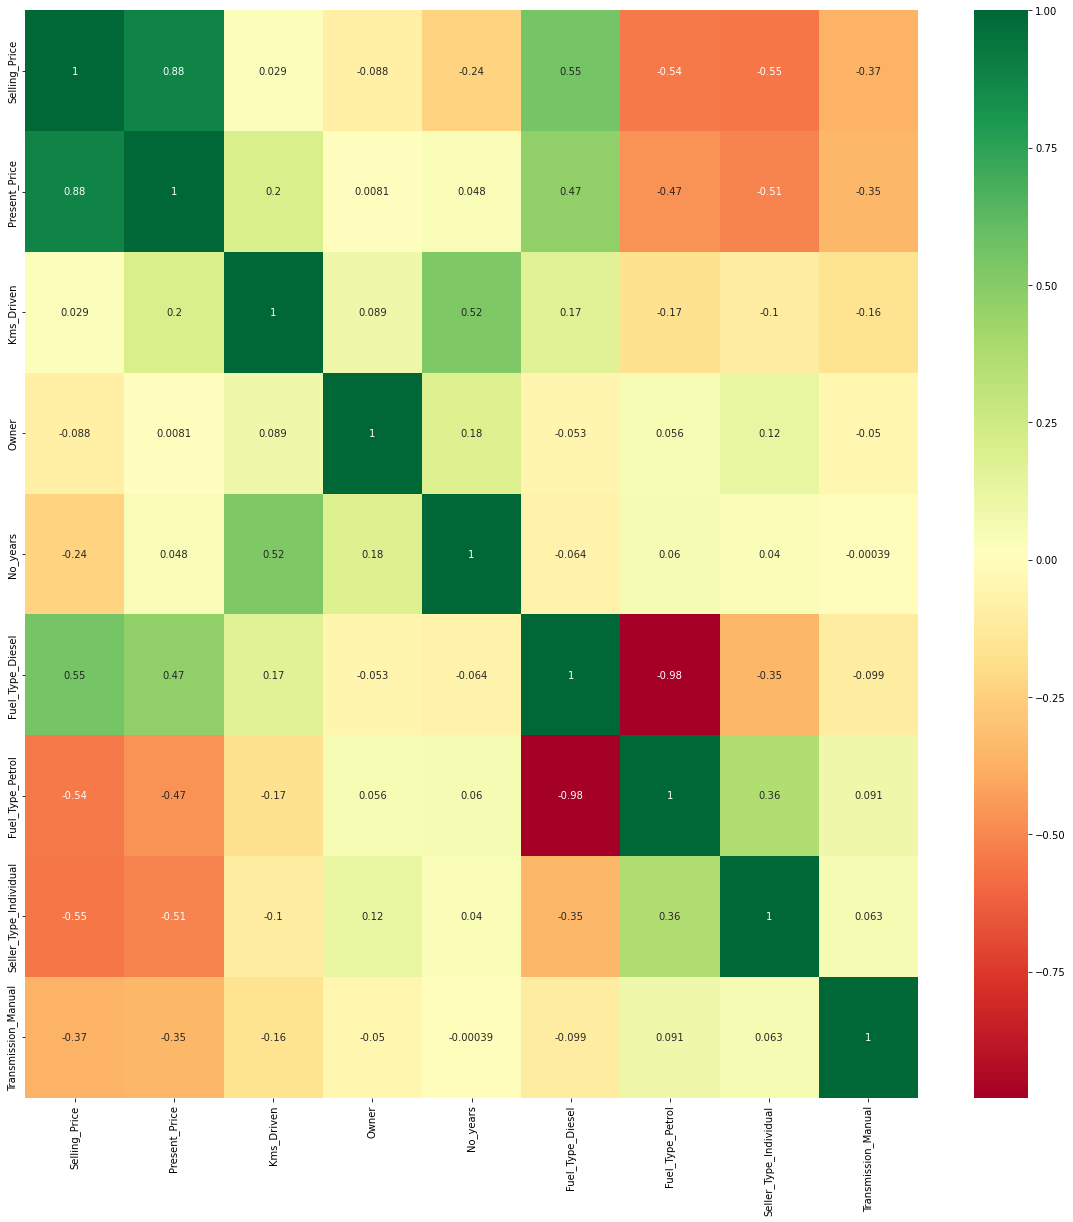

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

cormat=final_dataset.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

Selling price and present price are highly +ve correlated.
Fuel Type diesel and petrol are highlt -Ve correleted

# MODEL

In [25]:
# Seperate dependent and independent features
X=final_dataset.iloc[:,1:] # Exclude Seling price which is the feature to be predicted
y=final_dataset.iloc[:,0] # Selling Price

In [26]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [28]:
X.shape

(301, 8)

In [29]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[0.38642771 0.04177848 0.00040685 0.07550881 0.22058641 0.01388915
 0.13029014 0.13111246]


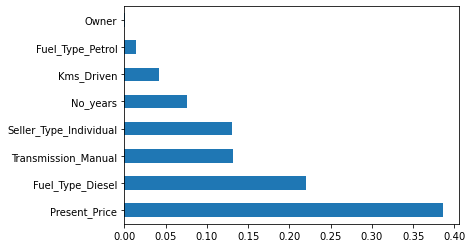

In [31]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(X.shape[1]).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
X_train.shape

(240, 8)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics


In [35]:
lr=LinearRegression().fit(X_train,y_train)

In [36]:
lr.score(X_train,y_train)

0.8757607627785047

In [37]:
lr.coef_

array([ 4.27210391e-01, -5.60741775e-06, -8.60983469e-01, -4.05193058e-01,
        2.38757884e+00,  6.02319076e-01, -1.00414247e+00, -1.39955932e+00])

In [38]:
lr.intercept_

5.645453684278909

In [39]:
y_pred=lr.predict(X_test)

In [40]:
y_pred

array([ 1.04134606,  1.63158391, 10.43450697,  0.03163987,  4.19595828,
        6.92642666,  4.46202686,  1.09886472,  6.58291069,  1.7004744 ,
        0.11588422,  7.59580984, -0.9655186 ,  5.36967548,  8.34293416,
        5.88174432,  7.88653605,  6.75017956,  9.81087923,  1.91923543,
        3.42930728,  2.56084529,  4.30858141,  3.52255015,  7.19172705,
        3.97158414, 18.04929449,  1.23760569,  4.93609959,  0.71305538,
       -0.19194459,  4.93223347,  1.54039274,  1.25709857,  6.75312392,
        0.88527935,  1.64253258,  3.40001911,  9.65752735,  6.12920122,
        2.13970261,  4.40088209,  3.04036185,  4.2395044 ,  1.3204863 ,
       -0.22643452,  5.98319271,  5.82577267,  4.39497187, 19.71659515,
        4.49897189,  1.42361219,  3.966849  ,  3.42825266,  6.72774989,
        9.0196069 ,  0.44382934,  2.20432959, 18.04929449,  2.7808803 ,
        2.76652943])

In [41]:
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.9053034102951509


In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1266343501856864
MSE: 2.4261919818642372
RMSE: 1.5576238255317736


In [43]:
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression().fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    print(r2_score(y_test,y_pred))

0.9144342972228517
0.8625260513315252
0.8502332355855594
0.841355053020514
0.8565237372294762
0.8589039971922924
0.7899244964858723
0.804807251622066
0.7763890133190314
0.8859983863468648


In [44]:
score=[]
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression().fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    score.append(r2_score(y_test,y_pred))

In [45]:
np.argmax(score) # index of max score

608

In [46]:
score[np.argmax(score)]

0.9371286628977251

In [47]:
#Use the split corresponding to random state =np.argmax(score) to predict
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=np.argmax(score))
lr_final=LinearRegression().fit(X_train,y_train)
y_pred=lr_final.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred))

r2_score: 0.9371286628977251


In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.8894597769423773
MSE: 1.500003213539028
RMSE: 1.224746183312701


In [49]:
import pickle
# open a file, where you ant to store the data
file = open('Linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr_final, file)